In [444]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from cv_utils import invert_image

In [460]:
image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\background_images_labelled\0\6020021201_0_tg1.png"#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\labelled_dataset\6020021201\6020021201.webp"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\background_images_augmented\augmented_0.png"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\generated_datasets\diffusion_models\image02.png"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\background_images_labelled\0\6020021201_0_mlg5.png"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\background_images_labelled\0\6020021201_0_tg4.png"

img = cv2.resize(cv2.imread(image_path, 0), (0, 0), fx=0.8, fy=0.8)
img = cv2.imread(image_path)
img = cv2.resize(img, (img.shape[0], img.shape[0]))

image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\background_images_labelled\0\6020021201_0_mdg5.png"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\background_images_labelled\0\6020021201_0_tg1.png"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\labelled_dataset\6020021201\6020021201.webp"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\dataA\6020021201_110.jpg"

template = cv2.resize(cv2.imread(image_path, 0), (0, 0), fx=0.8, fy=0.8)
template = cv2.imread(image_path)
template = invert_image(template)
template = cv2.resize(template, (224, 224))
#h, w = template.shape
h, w, c = template.shape
template.shape, img.shape

((224, 224, 3), (1024, 1024, 3))

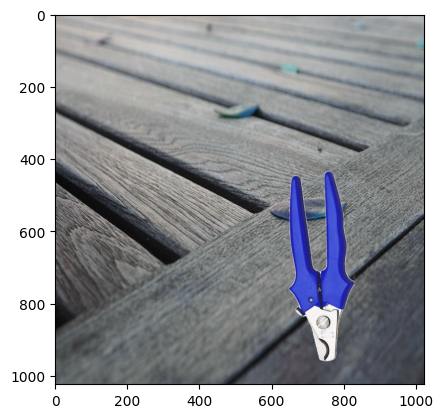

In [461]:
plt.imshow(img)

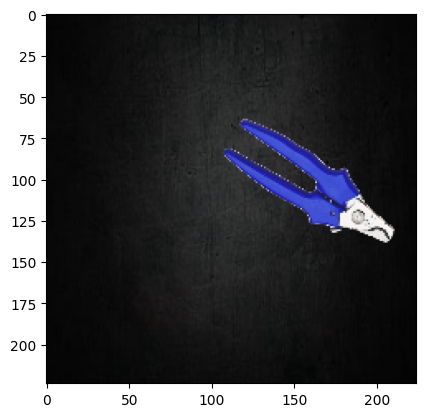

In [462]:
plt.imshow(template)

### Find mask

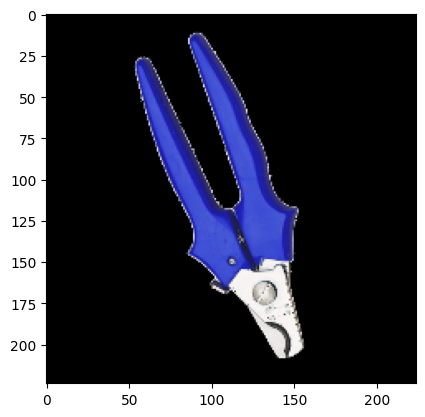

In [447]:
plt.imshow(template)

C:\Users\wn00217454\AppData\Local\Temp\ipykernel_52876\500525980.py:29: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  vertices = np.int0(vertices)


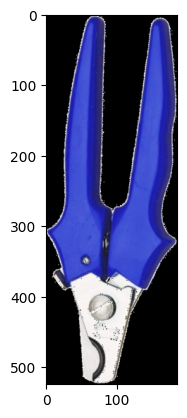

In [463]:
cropped_template = crop_img(straight_template)
plt.imshow(cropped_template)

In [465]:
cropped_template[0].shape

(186, 3)

In [466]:
cropped_template = crop_img(cropped_template)

C:\Users\wn00217454\AppData\Local\Temp\ipykernel_52876\500525980.py:29: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  vertices = np.int0(vertices)


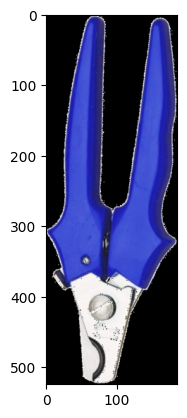

In [467]:
plt.imshow(cropped_template)

In [292]:
int(cropped_template.shape[0] / 2), int(cropped_template.shape[1] / 2)

(262, 93)

In [341]:
cropped_template = cv2.resize(cropped_template, (96, 262))

In [401]:
img.shape, cropped_template.shape, template.shape

((1280, 1280, 3), (525, 186, 3), (576, 576, 3))

0 4 4
1 5 5
2 2 2
3 3 3
4 0 0
5 1 1


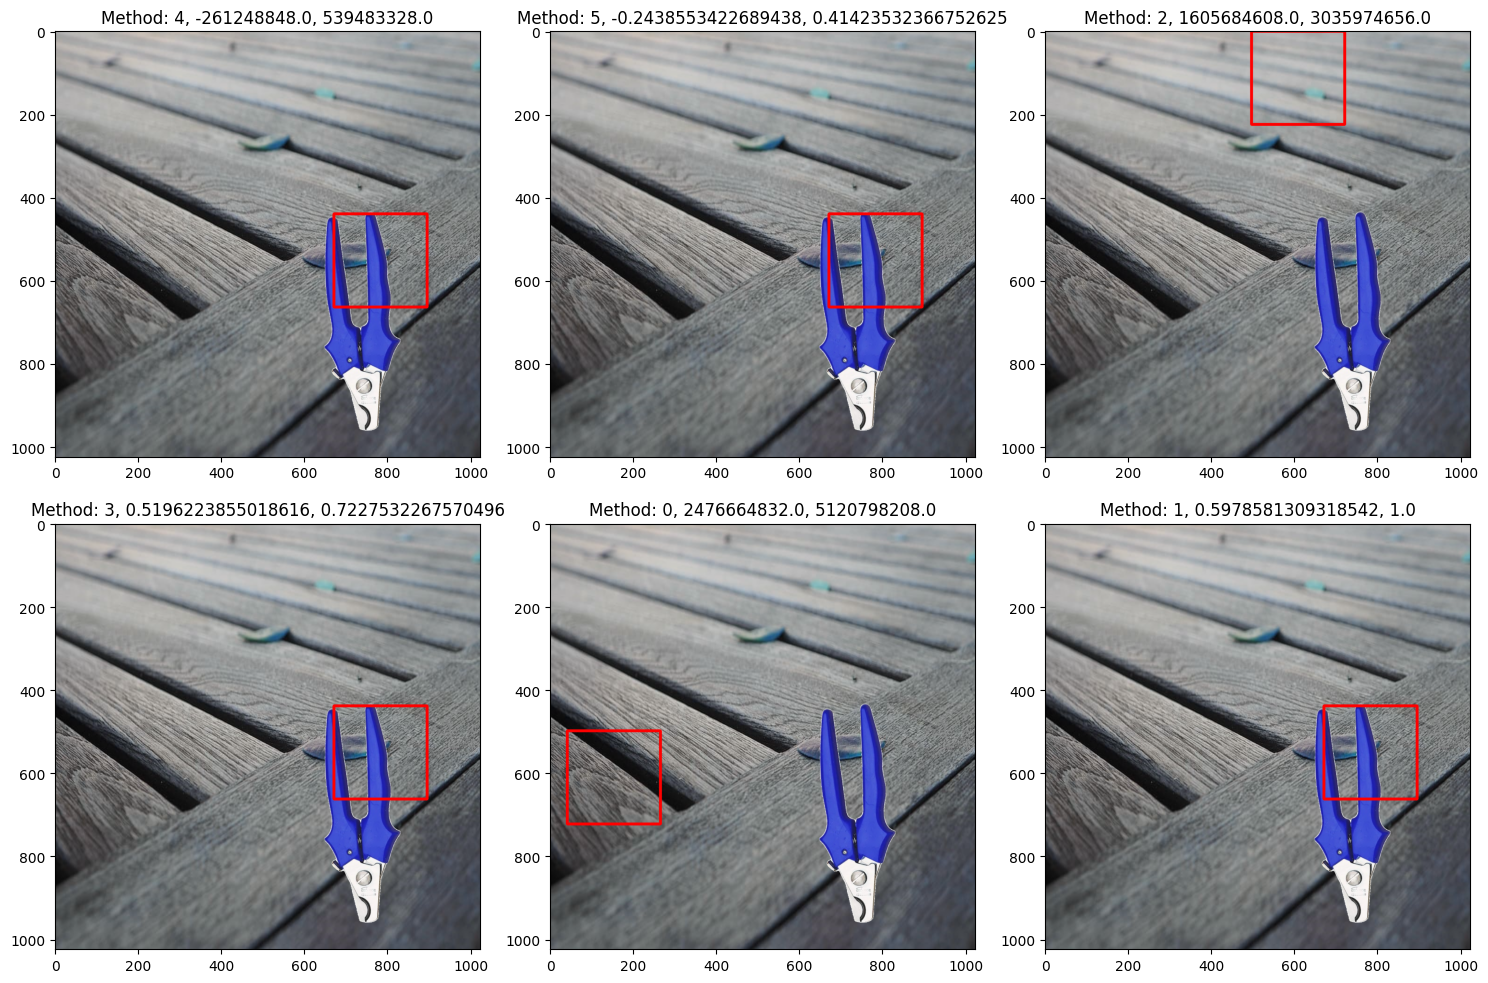

In [468]:
methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
            cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
#methods = [cv2.TM_CCOEFF_NORMED]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over each method
for i, method in enumerate(methods):
    # Copy the original image
    img2 = img.copy()
    
    # Perform template matching
    result = cv2.matchTemplate(img2, cropped_template, methods[i])
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    # Determine the location based on the method
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        location = min_loc
    else:
        location = max_loc
    
    # Draw a rectangle around the matched region
    bottom_right = (location[0] + w, location[1] + h)
    cv2.rectangle(img2, location, bottom_right, 255, 5)
    
    # Plot the image with the rectangle
    ax = axes[i // 3, i % 3]  # Calculate the subplot index
    ax.imshow(img2)
    ax.set_title(f"Method: {methods[i]}, {min_val}, {max_val}")  # Set title for the subplot
    
    # Get the cropped image from the region where the rectangle is drawn
    print(i, method, methods[i])
    cropped_img = img2[location[1] + 5:bottom_right[1] - 5, location[0] + 5:bottom_right[0] - 5]

# Show the plot
plt.tight_layout()
plt.show()

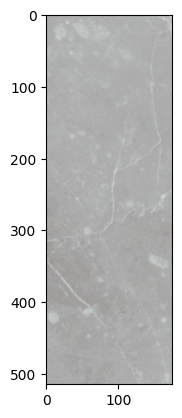

In [403]:
plt.imshow(cropped_img)

In [385]:
cropped_img.shape, cropped_template.shape

((566, 566, 3), (525, 186, 3))

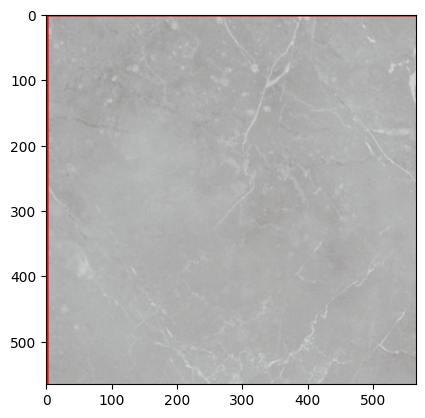

In [386]:
#template = cv2.imread(image_path)
#template = invert_image(template)
#template = cv2.resize(template, (224, 224))
new_img = cropped_img.copy()
new_result = cv2.matchTemplate(new_img, cropped_template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(new_result)
    
location = max_loc

# Draw a rectangle around the matched region
bottom_right = (location[0] + w, location[1] + h)
cv2.rectangle(new_img, location, bottom_right, 255, 5)
plt.imshow(new_img)

In [387]:
min_val, max_val, min_loc, max_loc

(-0.08843639492988586, 0.2292925864458084, (359, 0), (0, 0))

In [74]:
min_val == max_val

False

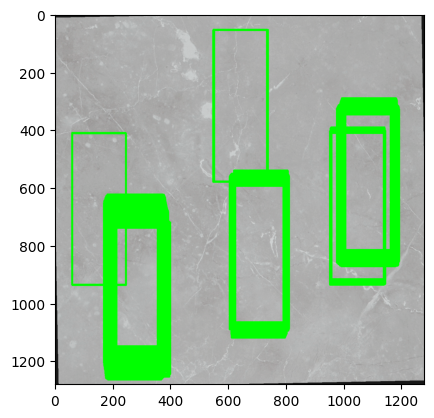

In [400]:
# Perform template matching to find the stars
base_image = img.copy()
result = cv2.matchTemplate(base_image, cropped_template, cv2.TM_CCOEFF_NORMED)
threshold = 0.2
locations = np.where(result >= threshold)

# Draw rectangles around the found stars
for loc in zip(*locations[::-1]):
    h, w = cropped_template.shape[:2]
    cv2.rectangle(base_image, loc, (loc[0] + w, loc[1] + h), (0, 255, 0), 2)  # Draw a green rectangle

plt.imshow(base_image)

In [397]:
locations

(array([ 93,  93,  94, ..., 177, 177, 178], dtype=int64),
 array([591, 592, 590, ..., 608, 609, 608], dtype=int64))